```
.gitignore
README.md
configs/vg/vcr_softmaxed_triplet_1gpu.yaml
lib/core/get_val_test_proposals.py
lib/datasets/factory.py
lib/datasets/roidb_rel.py
lib/datasets/vcr_wiki_and_relco.py
lib/modeling/model_builder_rel.py
lib/roi_data/fast_rcnn_rel.py
lib/roi_data/loader_rel.py
lib/roi_data/minibatch_rel.py
lib/utils/env.py
tools/test_net_rel.py
```

In [ ]:
import json_lines
import os
d = {}
entries = []
val_fn= '/home/suji/spring20/vilbert_beta/data/VCR/orig/val.jsonl'

with json_lines.open(val_fn) as reader:
    for obj in reader:
        entries.append(obj)
for entry in entries:
    imgid =int(entry['img_id'].split('-')[1])
    if imgid not in d.keys():
        d[imgid] = os.path.join("/home/suji/spring20/vilbert_beta/data/VCR/vcr1images",entry['img_fn'])

In [ ]:
len(d)

In [4]:
_predicate_classes = []
with open('/home/suji/spring20/Large-Scale-VRD/datasets/large_scale_VRD/Visual_Genome/predicate_categories_spo_joined_and_merged.txt') as prd_classes:
        for line in prd_classes:
            _predicate_classes.append(line[:-1])
_object_categories = []
with open('/home/suji/spring20/Large-Scale-VRD/datasets/large_scale_VRD/Visual_Genome/object_categories_spo_joined_and_merged.txt') as obj_categories:
    for line in obj_categories:
        _object_categories.append(line[:-1])
print(len(_predicate_classes))
print(len(_object_categories))

29086
53304


In [20]:
import pickle as pkl 

fn = "checkpoints/vg_wiki_and_relco/VGG16_reldn_fast_rcnn_conv4_spo_for_p/embd_fusion_w_relu_yall/1gpus_vgg16_softmaxed_triplet_no_last_l2norm_trainval_w_cluster_2_lan_layers/test/reldn_detections.pkl"
with open(fn, "rb") as input_file:
    e = pkl.load(input_file, encoding='latin1')

In [21]:
e.keys()

dict_keys(['boxes_obj', 'gt_boxes_obj', 'gt_labels_sbj', 'labels_obj', 'labels_rel', 'scores_obj', 'gt_boxes_rel', 'image_id', 'scores_rel', 'scores_sbj', 'boxes_rel', 'labels_sbj', 'image_idx', 'boxes_sbj', 'gt_boxes_sbj', 'gt_labels_obj'])

In [22]:
#print(len(e[u'labels_obj']))
#print(len(e.keys()))
#print(e.keys())
boxes_obj = e[u'boxes_obj']
labels_obj = e[u'labels_obj']
labels_rel = e['labels_rel']
scores_obj = e[u'scores_obj']
image_id = e[u'image_id'] # []
scores_rel = e[u'scores_rel']
scores_sbj = e[u'scores_sbj']
boxes_rel = e[u'boxes_rel']
labels_sbj = e[u'labels_sbj']
image_idx = e[u'image_idx']
boxes_sbj = e[u'boxes_sbj']

In [24]:
print(list(zip(image_id, image_idx)))

[(2, 2), (0, 0), (1, 1), (3, 3), (6, 6), (7, 7), (5, 5), (4, 4), (9, 9), (8, 8), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (18, 18), (17, 17), (19, 19), (21, 21), (20, 20), (23, 23), (22, 22), (24, 24), (25, 25), (27, 27), (26, 26), (28, 28), (30, 30), (29, 29), (31, 31), (33, 33), (34, 34), (32, 32), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (43, 43), (44, 44), (45, 45), (42, 42), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (57, 57), (58, 58), (56, 56), (59, 59), (61, 61), (60, 60), (62, 62), (63, 63), (65, 65), (64, 64), (66, 66), (67, 67), (69, 69), (68, 68), (70, 70), (71, 71), (72, 72), (76, 76), (74, 74), (75, 75), (73, 73), (77, 77), (78, 78), (80, 80), (79, 79), (81, 81), (82, 82), (83, 83), (86, 86), (85, 85), (84, 84), (87, 87), (88, 88), (89, 89), (93, 93), (91, 91), (92, 92), (94, 94), (90, 90), (95, 95), (99, 99), (97, 97), (98, 98), (96, 96), (100, 100), (101, 1

In [10]:
i= 0
filtered_entries = []
for obj_bb, sbj_bb, obj_score, sbj_score, rel_score, label_obj, label_sbj, label_rel in zip(boxes_obj[i], boxes_sbj[i],scores_obj[i][0], scores_sbj[i][0],scores_rel[i][0], labels_obj[i][0],  labels_sbj[i][0], labels_rel[i][0]):
    print(rel_score)
    

0.19205162
0.18583357
0.14323628
0.13003072
0.10376516
0.10262366
0.0906304
0.08908877
0.07831088
0.076631635
0.06362278
0.056167874
0.05545073
0.0417272
0.040508553
0.036078036
0.035582826
0.032224543
0.03192944
0.027753457
0.025328372
0.021431377
0.013970323
0.013823509
0.011814344
0.009693967
0.00854427
0.007314844
0.003945209
0.002276185
0.0005935235
-0.0019413744
-0.0026068161
-0.006884504
-0.007220762
-0.010003187
-0.010844212
-0.017525323
-0.017717145
-0.021450713
-0.023469057
-0.023778223
-0.027418002
-0.027675956
-0.028880024
-0.028910512
-0.029125553
-0.033789285
-0.034544937
-0.03618488
-0.03905209
-0.040941164
-0.042008825
-0.042951412
-0.043546844
-0.04358184
-0.04489445
-0.045767423
-0.045846514
-0.046224065
-0.04796291
-0.049370874
-0.049404606
-0.05112772
-0.051136356
-0.051485494
-0.052172493
-0.05392697
-0.053955927
-0.054877114
-0.055139825
-0.0554036
-0.056468256
-0.05673583
-0.05702795
-0.057591744
-0.057903152
-0.058435753
-0.05896902
-0.0597631
-0.059927464
-0.06

In [40]:
%matplotlib inline

import json 
import re 
from shutil import copy2
from PIL import Image, ImageDraw, ImageFont,ImageFont
import matplotlib.pyplot as plt
import glob
import os
import json
import dlib
from skimage import io
import numpy as np
import shutil
from collections import defaultdict
from object_detection.utils import visualization_utils as vis_util
import scipy.misc

if os.path.exists('caption.txt'):
    os.remove('caption.txt')
c_f = open("caption.txt", "a")

for i, idx in enumerate(image_idx[:200]):
    boxes_ = []
    classes_ = []
    scores_ = []
    cate = {}
    fn = d[idx]
    entry_no = 0
    c_f.write(fn + "\n")
    print(fn)
    img = io.imread(fn)
    for obj_bb, sbj_bb, obj_score, sbj_score, rel_score, label_obj, label_sbj, label_rel in zip(boxes_obj[i], boxes_sbj[i],scores_obj[i][0], scores_sbj[i][0],scores_rel[i][0], labels_obj[i][0],  labels_sbj[i][0], labels_rel[i][0]):
        if rel_score < 0.1:
            continue 
        print(obj_bb, sbj_bb, obj_score, sbj_score, rel_score, _object_categories[label_sbj], _predicate_classes[label_rel], _object_categories[label_obj])
        ox1, oy1, ox2, oy2 = obj_bb 
        pred_rel = _predicate_classes[label_rel]
        str_label_sbj, str_label_obj = _object_categories[label_sbj], _object_categories[label_obj]
        boxes_.append((int(oy1), int(ox1), int(oy2), int(ox2))) 
        context ="entry_no: {}, subject {}, pred {}, object {}".format(entry_no, str_label_sbj,pred_rel, str_label_obj)
        cate[len(classes_)] = {'name': context}
        scores_.append(rel_score)        
        classes_.append(len(classes_))
        c_f.write(context +"\n")
        sx1, sy1, sx2, sy2 = sbj_bb
        boxes_.append((int(sy1), int(sx1), int(sy2), int(sx2))) 
        #cate[len(classes_)] = {'name': "object, subject {}, pred {}, object {}".format(str_label_sbj,pred_rel, str_label_obj)}
        scores_.append(rel_score)        
        classes_.append(len(classes_)-1)
        entry_no +=1 
        
    boxes = np.array(boxes_)
    classes = np.array(classes_)
    scores = np.array(scores_)
    vis_util.visualize_boxes_and_labels_on_image_array(img, boxes, classes, scores, cate, min_score_thresh=0.0, skip_scores=1, track_ids = None)
    plt.imsave('vcr_eval/{}'.format(os.path.basename(fn)), img)
#     fig2 = plt.figure(figsize = (1.920*10,.797*10)) # create a 5 x 5 figure 
#     ax3 = fig2.add_subplot(111)
#     ax3.imshow(img,aspect='auto')
#     plt.show()
c_f.close()
#     plt.imsave('vcr_eval/{}.jpg'.format(os.path.basename(fn)))

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_01.20.34.896-01.20.49.435@3.jpg
[1111.       154.00002 1394.0001   776.     ] [1350.        82.      1820.0001   769.00006] 0.64701426 0.64779747 0.17126285 woman wearing woman
[1111.       154.00002 1394.0001   776.     ] [ 585.       147.      1026.       781.00006] 0.5660391 0.5824022 0.16091385 lady with lady
[1111.       154.00002 1394.0001   776.     ] [ 753.       482.00003 1116.       785.     ] 0.5580723 0.56379306 0.15560782 man on person
[1111.       154.00002 1394.0001   776.     ] [ 942.00006  504.00003 1131.       787.00006] 0.55448246 0.5616604 0.1397662 person next to girl
[1350.        82.      1820.0001   769.00006] [1111.       154.00002 1394.0001   776.     ] 0.49758846 0.5242195 0.13450967 girl sitting on female
[1350.        82.      1820.0001   769.00006] [ 585.       147.      1026.       781.00006] 0.4969616 0.49

[ 63.000004   0.       489.00003  814.00006 ] [ 869.       85.     1373.0001  821.    ] 0.6498078 0.5930475 0.17716165 man behind woman
[ 63.000004   0.       489.00003  814.00006 ] [1576.       108.00001 1919.0001   805.00006] 0.6002966 0.5801069 0.17466244 woman wearing bride
[ 63.000004   0.       489.00003  814.00006 ] [598.00006 177.      951.00006 816.00006] 0.56630725 0.54509306 0.15720226 groom next to dress
[ 63.000004   0.       489.00003  814.00006 ] [1223.0001   88.     1492.      806.    ] 0.5610053 0.52424437 0.13586834 person with lady
[ 63.000004   0.       489.00003  814.00006 ] [1438.  233. 1545.  581.] 0.55145985 0.5212611 0.13018918 bride in groom
[ 63.000004   0.       489.00003  814.00006 ] [666.      153.      801.00006 410.00003] 0.54813886 0.48474312 0.124843776 lady near man
[ 63.000004   0.       489.00003  814.00006 ] [1521.      131.     1776.0001  773.    ] 0.53743786 0.47561634 0.12170792 couple standing next to couple
[ 63.000004   0.       489.00003  81

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3036_IN_TIME/3036_IN_TIME_00.47.35.702-00.47.36.509@0.jpg
[ 703.00006    37.000004 1488.        790.00006 ] [ 48.  87. 744. 791.] 0.72137046 0.5871444 0.24826902 hair behind man
[ 703.00006    37.000004 1488.        790.00006 ] [ 192.         62.000004 1187.0001    797.      ] 0.57001007 0.5826695 0.16349557 girl next to person
[ 703.00006    37.000004 1488.        790.00006 ] [1177.  573. 1261.  788.] 0.5488837 0.5494761 0.14640573 head on guy
[ 703.00006    37.000004 1488.        790.00006 ] [1408.       24.     1896.0001  797.    ] 0.49860725 0.54448426 0.13808148 woman in front of he
[ 48.  87. 744. 791.] [ 703.00006    37.000004 1488.        790.00006 ] 0.47477758 0.48964453 0.12882832 child near male
[ 48.  87. 744. 791.] [ 192.         62.000004 1187.0001    797.      ] 0.45366612 0.47411215 0.119173534 face by boy
[ 48.  87. 744. 791.] [1177.  573. 1261.  788.] 0.4510705 0.47206682 0.118281215 person in wall
[ 48.  87. 

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0050_Indiana_Jones_and_the_last_crusade/0050_Indiana_Jones_and_the_last_crusade_00.27.24.997-00.27.32.931@3.jpg
[ 51.000004 114.00001  999.00006  787.00006 ] [231.00002 198.      886.00006 654.     ] 0.6087634 0.7394552 0.1942623 hand on hand
[ 51.000004 114.00001  999.00006  787.00006 ] [ 847.00006  251.00002 1441.       805.00006] 0.50175625 0.549579 0.15254462 right hand holding person
[ 51.000004 114.00001  999.00006  787.00006 ] [ 693.       116.00001 1203.       567.     ] 0.47936368 0.5485665 0.13964924 left hand of man
[231.00002 198.      886.00006 654.     ] [ 51.000004 114.00001  999.00006  787.00006 ] 0.4371403 0.5166534 0.117253974 person in arm
[231.00002 198.      886.00006 654.     ] [ 847.00006  251.00002 1441.       805.00006] 0.40002775 0.5012211 0.11369155 mans hand has phone
[231.00002 198.      886.00006 654.     ] [ 693.       116.00001 1203.       567.     ] 0.3887635 0.48396757 0.11059666 persons hand t

[ 845.         37.000004 1297.        791.      ] [444.00003 201.00002 820.00006 798.     ] 0.64348716 0.7469299 0.25078762 woman looking at man
[ 845.         37.000004 1297.        791.      ] [796.00006 535.00006 878.      798.     ] 0.5816108 0.70665264 0.23866409 lady standing next to woman
[444.00003 201.00002 820.00006 798.     ] [ 845.         37.000004 1297.        791.      ] 0.5756773 0.638452 0.23748219 person watching guy
[444.00003 201.00002 820.00006 798.     ] [796.00006 535.00006 878.      798.     ] 0.542027 0.61517864 0.23007481 girl next to lady
[796.00006 535.00006 878.      798.     ] [ 845.         37.000004 1297.        791.      ] 0.53834355 0.6030855 0.22523052 female behind boy
[796.00006 535.00006 878.      798.     ] [444.00003 201.00002 820.00006 798.     ] 0.5381577 0.55605793 0.21519981 man in front of male
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3036_IN_TIME/3036_IN_TIME_00.32.44.634-00.32.45.739@0.jpg
[ 864.00006    29.000002 1527.  

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0041_The_Sixth_Sense/0041_The_Sixth_Sense_01.23.10.739-01.23.15.745@0.jpg
[1216.  412. 1882. 1072.] [ 501.00003   72.       833.      1076.0001 ] 0.6439824 0.7529342 0.14068958 man standing next to man
[1216.  412. 1882. 1072.] [   0.    3.  328. 1075.] 0.5596775 0.58719766 0.1287816 guy next to person
[1216.  412. 1882. 1072.] [1015.         55.000004 1335.        687.      ] 0.50671065 0.5846788 0.12383428 person talking to boy
[1216.  412. 1882. 1072.] [ 782.       263.00003 1308.      1079.0001 ] 0.5004811 0.5739474 0.11547462 suit looking at guy
[1216.  412. 1882. 1072.] [ 856.00006   69.      1118.0001   499.00003] 0.4901217 0.54511255 0.11413377 gentleman near people
[1216.  412. 1882. 1072.] [ 249.00002   85.       521.      1062.     ] 0.4698787 0.51404697 0.10747493 men with head
[1216.  412. 1882. 1072.] [ 821.       130.00002 1205.0001   828.00006] 0.45164457 0.5076433 0.1058768 he in front of male
/home/suji/spring

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0050_Indiana_Jones_and_the_last_crusade/0050_Indiana_Jones_and_the_last_crusade_01.27.21.323-01.27.25.829@1.jpg
[ 683.       120.00001 1161.       819.00006] [ 27.000002  88.       547.00006  813.00006 ] 0.71073925 0.6719574 0.20743877 man next to man
[ 683.       120.00001 1161.       819.00006] [1487.0001   300.      1821.0001   814.00006] 0.6055665 0.6060475 0.17948072 person behind person
[ 683.       120.00001 1161.       819.00006] [377.00003  73.      743.      807.00006] 0.576525 0.54894567 0.15551843 guy near guy
[ 683.       120.00001 1161.       819.00006] [1407.  186. 1477.  487.] 0.5443496 0.5271649 0.15383607 boy and boy
[ 683.       120.00001 1161.       819.00006] [584.      376.      636.      467.00003] 0.5428133 0.49974412 0.14248855 woman by woman
[ 683.       120.00001 1161.       819.00006] [347.00003 280.      480.00003 503.     ] 0.51143247 0.49328423 0.14030334 cameraman with uniform
[ 27.000002  88.   

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3088_WHATS_YOUR_NUMBER/3088_WHATS_YOUR_NUMBER_01.11.07.544-01.11.20.251@0.jpg
[ 865.00006    27.000002 1423.        702.      ] [1426.       223.00002 1619.0001   658.00006] 0.7095593 0.6090692 0.1720562 woman behind man
[ 865.00006    27.000002 1423.        702.      ] [924.00006 195.      944.      259.     ] 0.5636249 0.5654478 0.1328719 lady on guy
[ 865.00006    27.000002 1423.        702.      ] [ 316.  527. 1666. 1035.] 0.5603365 0.5279682 0.11669204 person next to person
[ 865.00006    27.000002 1423.        702.      ] [ 37.000004 311.00003  109.       394.      ] 0.49372992 0.5117297 0.10680127 girl near gentleman
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_00.33.46.658-00.33.48.692@0.jpg
[ 957.00006  211.00002 1579.       808.00006] [  1.        0.      693.      820.00006] 0.6665821 0.6966961 0.12109689 man next to woman
[ 957.00006  211.00002 1579.       808.00006] [ 958.000

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0014_Ist_das_Leben_nicht_schoen/0014_Ist_das_Leben_nicht_schoen_00.55.11.668-00.55.12.213@0.jpg
[671.      228.00002 820.00006 533.     ] [228.00002 194.      461.00003 820.00006] 0.61056757 0.6721879 0.163797 man in man
[671.      228.00002 820.00006 533.     ] [ 889.00006  266.00003 1018.       504.00003] 0.54850656 0.6104931 0.16153021 boy with person
[671.      228.00002 820.00006 533.     ] [798.      285.      933.00006 524.     ] 0.51656204 0.6014825 0.16006547 person has boy
[671.      228.00002 820.00006 533.     ] [438.00003 180.      604.00006 357.     ] 0.48592407 0.54968333 0.13955323 woman wearing woman
[671.      228.00002 820.00006 533.     ] [1457.0001   313.      1578.       501.00003] 0.47576576 0.54656184 0.10788909 guy behind guy
[671.      228.00002 820.00006 533.     ] [313.      272.00003 624.      756.     ] 0.4750407 0.49655402 0.10272223 child next to officer
/home/suji/spring20/vilbert_beta/data/VCR/

[1582.   90. 1918.  803.] [206.  87. 653. 798.] 0.6175475 0.6760229 0.11759594 man watching man
[1582.   90. 1918.  803.] [1560.       718.00006 1643.0001   786.     ] 0.54928464 0.58886623 0.10521768 woman next to woman
[1582.   90. 1918.  803.] [  4.      374.00003 164.      425.00003] 0.53751343 0.58487564 0.10184952 suit in front of person
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_01.10.07.477-01.10.15.892@2.jpg
[  86.00001   85.      1078.       816.00006] [ 736.00006  173.      1034.0001   665.     ] 0.72240007 0.60383767 0.22436292 man behind man
[  86.00001   85.      1078.       816.00006] [1330.       208.00002 1581.       679.00006] 0.606767 0.5652793 0.13316885 person wearing person
[  86.00001   85.      1078.       816.00006] [1562.0001   99.     1916.0001  809.    ] 0.5816108 0.54261357 0.12808716 woman in guy
[  86.00001   85.      1078.       816.00006] [1495.       489.00003 1744.       814.00006] 0.5292339 0.5219737 0.113435

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_01.47.54.928-01.48.05.729@1.jpg
[642.       74.00001 887.      792.     ] [ 855.00006  107.00001 1187.0001   796.00006] 0.64453185 0.70152116 0.2614441 woman next to man
[642.       74.00001 887.      792.     ] [ 98.00001 293.00003 279.      574.00006] 0.63052267 0.62399626 0.24925326 girl standing next to boy
[642.       74.00001 887.      792.     ] [1415.0001   344.00003 1917.0001   544.00006] 0.59170365 0.61256194 0.21613893 lady near person
[642.       74.00001 887.      792.     ] [245. 321. 439. 563.] 0.57230073 0.6096219 0.2079306 person by woman
[642.       74.00001 887.      792.     ] [ 83.00001 363.      116.00001 443.00003] 0.53031564 0.549446 0.19531134 people in front of guy
[642.       74.00001 887.      792.     ] [234.00002 476.00003 446.00003 782.     ] 0.50318766 0.5009717 0.19147292 female behind girl
[642.       74

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3088_WHATS_YOUR_NUMBER/3088_WHATS_YOUR_NUMBER_00.08.16.181-00.08.19.415@0.jpg
[1023.00006  361.      1413.       921.00006] [1228.       380.00003 1424.0001   875.     ] 0.474778 0.39423895 0.23111962 shadow of person
[1023.00006  361.      1413.       921.00006] [ 552.       778.00006  829.00006 1026.     ] 0.46613586 0.39168286 0.21308641 hose on man
[1023.00006  361.      1413.       921.00006] [ 439.       903.00006  632.      1035.     ] 0.45857632 0.32895795 0.17431054 toilet in woman
[1023.00006  361.      1413.       921.00006] [ 623.       906.00006  775.00006 1029.     ] 0.4061924 0.31821993 0.15112212 chair behind lady
[1228.       380.00003 1424.0001   875.     ] [1023.00006  361.      1413.       921.00006] 0.4007491 0.3101244 0.14420009 leg under chair
[1228.       380.00003 1424.0001   875.     ] [ 552.       778.00006  829.00006 1026.     ] 0.38536474 0.303773 0.11587657 urinal next to girl
[1228.       380.0000

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3088_WHATS_YOUR_NUMBER/3088_WHATS_YOUR_NUMBER_00.13.05.011-00.13.19.335@4.jpg
[1612.      403.     1857.0001 1032.    ] [1386.      509.     1671.0001 1036.    ] 0.7003501 0.6877425 0.16059658 woman next to man
[1612.      403.     1857.0001 1032.    ] [ 557.       536.       810.00006 1032.     ] 0.6015879 0.64140505 0.13538443 girl wearing person
[1612.      403.     1857.0001 1032.    ] [ 982.00006  379.      1267.      1035.     ] 0.5965361 0.6202798 0.13506232 lady on woman
[1612.      403.     1857.0001 1032.    ] [  0.      641.      237.00002 998.00006] 0.58075064 0.59991837 0.13275984 person near guy
[1612.      403.     1857.0001 1032.    ] [1145.0001   196.00002 1259.0001   546.     ] 0.54476434 0.5580731 0.12618454 female in people
[1612.      403.     1857.0001 1032.    ] [623.      177.      745.00006 450.00003] 0.5382196 0.5284206 0.124284595 people in front of shirt
[1612.      403.     1857.0001 1032.    ] [131

[424.      147.      802.00006 812.     ] [ 789.         30.000002 1218.        808.00006 ] 0.7205155 0.72604513 0.27474597 man next to woman
[424.      147.      802.00006 812.     ] [318.      249.00002 445.      494.     ] 0.6667327 0.57584333 0.24185045 guy standing next to girl
[424.      147.      802.00006 812.     ] [1258.       238.00002 1310.0001   424.     ] 0.64902693 0.5757746 0.22392252 person near lady
[424.      147.      802.00006 812.     ] [772.00006 240.00002 827.      394.     ] 0.643116 0.5576715 0.21395093 suit by person
[424.      147.      802.00006 812.     ] [1164.       245.      1208.0001   371.00003] 0.5650609 0.5462118 0.21077858 boy and people
[424.      147.      802.00006 812.     ] [1323.       257.00003 1362.       365.00003] 0.5629799 0.52687556 0.20494837 gentleman beside female
[424.      147.      802.00006 812.     ] [1193.0001   240.00002 1284.       424.     ] 0.51174 0.51083976 0.18403275 he behind child
[424.      147.      802.00006 812.   

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0050_Indiana_Jones_and_the_last_crusade/0050_Indiana_Jones_and_the_last_crusade_00.36.47.724-00.36.54.038@1.jpg
[ 784.00006  291.      1540.       809.     ] [ 807.00006  451.      1040.0001   810.00006] 0.70379955 0.6856116 0.18978576 man wearing man
[ 784.00006  291.      1540.       809.     ] [1182.       493.00003 1250.0001   584.     ] 0.52843946 0.54640853 0.15317322 person on person
[ 807.00006  451.      1040.0001   810.00006] [ 784.00006  291.      1540.       809.     ] 0.51737875 0.50992686 0.14407828 jacket in jacket
[ 807.00006  451.      1040.0001   810.00006] [1182.       493.00003 1250.0001   584.     ] 0.50456226 0.4847 0.13266988 suit has suit
[1182.       493.00003 1250.0001   584.     ] [ 784.00006  291.      1540.       809.     ] 0.50266343 0.48012045 0.120537646 coat behind guy
[1182.       493.00003 1250.0001   584.     ] [ 807.00006  451.      1040.0001   810.00006] 0.4991773 0.47913012 0.11299452 woma

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_01.00.48.188-01.00.57.235@3.jpg
[1346.0001  131.     1805.0001  815.    ] [ 784.00006   79.      1209.       816.00006] 0.60770756 0.6678863 0.14230661 man with woman
[1346.0001  131.     1805.0001  815.    ] [666.      244.00002 772.00006 624.     ] 0.57675534 0.6362134 0.13019764 woman next to man
[1346.0001  131.     1805.0001  815.    ] [1815.0001   334.      1914.0001   619.00006] 0.54074144 0.60529053 0.13009846 person in person
[1346.0001  131.     1805.0001  815.    ] [389.00003 388.      662.      800.     ] 0.5206782 0.5643281 0.11335467 lady on lady
[1346.0001  131.     1805.0001  815.    ] [899.      157.00002 993.00006 552.     ] 0.5012857 0.55181265 0.11012433 guy wearing people
[1346.0001  131.     1805.0001  815.    ] [435.00003 408.00003 525.      549.     ] 0.4768442 0.52270097 0.106724404 groom near girl
[1346.0001  131.     1805.0001  815.    ] [ 12.       73.      586.00006 818.   

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0014_Ist_das_Leben_nicht_schoen/0014_Ist_das_Leben_nicht_schoen_02.04.41.796-02.04.44.321@0.jpg
[ 905.       216.00002 1110.       397.     ] [ 421.      183.     1210.     1055.0001] 0.6759478 0.6678382 0.37166035 woman has hair
[ 905.       216.00002 1110.       397.     ] [1338.       115.      1366.       226.00002] 0.5547317 0.5955825 0.31885388 girl with black hair
[ 905.       216.00002 1110.       397.     ] [1311.      109.     1343.0001  227.    ] 0.5540701 0.5732706 0.17043757 lady have head
[ 421.      183.     1210.     1055.0001] [ 905.       216.00002 1110.       397.     ] 0.54928243 0.56868446 0.1396465 person wearing brown hair
[ 421.      183.     1210.     1055.0001] [1338.       115.      1366.       226.00002] 0.52600384 0.53781825 0.12225045 man holding dark hair
[ 421.      183.     1210.     1055.0001] [1311.      109.     1343.0001  227.    ] 0.52241945 0.53700197 0.104433306 female and blonde hair
[13

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3088_WHATS_YOUR_NUMBER/3088_WHATS_YOUR_NUMBER_01.26.21.484-01.26.25.105@0.jpg
[1638.0001    78.      1919.0001  1017.00006] [1405.  118. 1690.  632.] 0.67186457 0.6018855 0.22695966 shirt on woman
[1638.0001    78.      1919.0001  1017.00006] [ 392.00003  104.00001 1061.0001  1030.     ] 0.65905523 0.5511531 0.15154244 man next to girl
[1638.0001    78.      1919.0001  1017.00006] [747.      137.      962.      532.00006] 0.60395056 0.52883303 0.1424247 jacket of lady
[1638.0001    78.      1919.0001  1017.00006] [1359.         61.000004 1749.0001   1019.00006 ] 0.56686497 0.5199244 0.12926719 sweater behind person
[1638.0001    78.      1919.0001  1017.00006] [1021.  182. 1203.  515.] 0.55642563 0.48176825 0.12785867 hoodie worn by female
[1638.0001    78.      1919.0001  1017.00006] [  18.  150.  626. 1021.] 0.5514601 0.48041287 0.118048534 vest held by child
[1638.0001    78.      1919.0001  1017.00006] [1.0500000e+03 1.0000

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1020_Crazy_Stupid_Love/1020_Crazy_Stupid_Love_00.24.58.505-00.25.07.579@1.jpg
[ 625.00006   14.      1695.0001   807.00006] [218. 373. 307. 642.] 0.70139056 0.6750496 0.17653954 woman behind man
[ 625.00006   14.      1695.0001   807.00006] [525.      398.00003 589.00006 586.00006] 0.5650436 0.62572527 0.13561778 person in guy
[ 625.00006   14.      1695.0001   807.00006] [749.      409.      785.      505.00003] 0.54572517 0.59339 0.122621045 lady on person
[ 625.00006   14.      1695.0001   807.00006] [279.      375.      390.      625.00006] 0.5121766 0.5449878 0.12136983 girl next to he
[ 625.00006   14.      1695.0001   807.00006] [592.00006 402.00003 641.      530.     ] 0.50204533 0.5396425 0.12078138 people near gentleman
[ 625.00006   14.      1695.0001   807.00006] [655.00006 400.      717.      475.     ] 0.48056102 0.5121726 0.11886442 man in front of people
[ 625.00006   14.      1695.0001   807.00006] [541.00006 2

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0010_Frau_Ohne_Gewissen/0010_Frau_Ohne_Gewissen_00.26.24.169-00.26.29.420@0.jpg
[1009.      256.     1409.0001 1069.    ] [ 649.00006  139.00002 1083.      1064.0001 ] 0.7166745 0.7390727 0.27993155 man next to woman
[1009.      256.     1409.0001 1069.    ] [790.00006 349.      918.00006 687.     ] 0.66432023 0.6247686 0.25128114 guy standing next to lady
[1009.      256.     1409.0001 1069.    ] [1319.0001   666.      1379.0001   802.00006] 0.6169277 0.5579791 0.24043952 person near girl
[1009.      256.     1409.0001 1069.    ] [ 622.00006  765.       721.00006 1043.0001 ] 0.5539041 0.5505384 0.23024036 male by person
[1009.      256.     1409.0001 1069.    ] [1453.       858.00006 1668.0001  1073.0001 ] 0.5459957 0.54989755 0.2059369 he beside female
[1009.      256.     1409.0001 1069.    ] [ 481.  761.  713. 1069.] 0.52724886 0.52807456 0.18865661 boy and she
[ 649.00006  139.00002 1083.      1064.0001 ] [1009.      256. 

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0050_Indiana_Jones_and_the_last_crusade/0050_Indiana_Jones_and_the_last_crusade_01.11.07.097-01.11.13.048@2.jpg
[1436.0001    50.      1915.       802.00006] [ 47.      139.00002 289.      817.00006] 0.6674163 0.6414167 0.12952934 woman watching man
[1436.0001    50.      1915.       802.00006] [309.      128.      541.00006 818.     ] 0.5399418 0.5936207 0.105780125 person in front of suit
[1436.0001    50.      1915.       802.00006] [577.00006 126.00001 803.      819.00006] 0.52512825 0.58703506 0.102385774 lady next to jacket
[1436.0001    50.      1915.       802.00006] [ 782.       113.00001 1037.0001   820.00006] 0.5154488 0.5434948 0.100914955 man looking at shirt
[1436.0001    50.      1915.       802.00006] [1014.00006  104.00001 1337.0001   812.     ] 0.5125099 0.52619654 0.100477956 people near guy
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0014_Ist_das_Leben_nicht_schoen/0014_Ist_das_Leben_nicht_sch

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_00.45.29.487-00.45.31.747@0.jpg
[  4.        7.      808.00006 812.     ] [ 908.        83.00001 1326.       675.     ] 0.59512293 0.65273523 0.17317861 woman in hair
[  4.        7.      808.00006 812.     ] [1064.0001     29.000002 1125.        149.      ] 0.54579055 0.5611973 0.13310334 lady on woman
[  4.        7.      808.00006 812.     ] [885.00006 649.00006 966.00006 806.     ] 0.49380744 0.5170162 0.11217656 girl next to lady
[  4.        7.      808.00006 812.     ] [1409.0001  188.     1882.      701.    ] 0.48352474 0.51243097 0.111236244 reflection near brown hair
[  4.        7.      808.00006 812.     ] [1558.       387.      1696.       703.00006] 0.47479483 0.50551015 0.10229357 person of head
[  4.        7.      808.00006 812.     ] [1459.       502.00003 1555.       675.     ] 0.4735707 0.47039288 0.10136129 people behind girl
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsm

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_01.14.29.092-01.14.40.139@1.jpg
[  0.        15.000001 948.00006  819.00006 ] [1157.0001     20.000002 1919.0001    802.00006 ] 0.6338409 0.662441 0.19058427 woman next to man
[  0.        15.000001 948.00006  819.00006 ] [615.      367.      788.      688.00006] 0.5942962 0.6067126 0.15580952 man with boy
[  0.        15.000001 948.00006  819.00006 ] [ 822.00006   96.      1227.       813.00006] 0.57018036 0.6009277 0.14575778 person near woman
[  0.        15.000001 948.00006  819.00006 ] [740.      332.00003 912.00006 621.     ] 0.55010843 0.5460487 0.14516136 lady and person
[  0.        15.000001 948.00006  819.00006 ] [656.      343.      880.00006 667.00006] 0.5204121 0.5222403 0.1394456 girl in front of guy
[1157.0001     20.000002 1919.0001    802.00006 ] [  0.        15.000001 948.00006  819.00006 ] 0.4936707 0.51125836 0.13087764 people by girl
[1157.0001     20.000002 1919.0001    802.00006

[1235.0001     49.000004 1903.        804.00006 ] [  0.        7.      658.00006 779.     ] 0.66445696 0.64032227 0.19158727 man next to woman
[1235.0001     49.000004 1903.        804.00006 ] [ 517.00006    60.000004 1125.        802.00006 ] 0.59128004 0.6039101 0.18442509 woman behind lady
[1235.0001     49.000004 1903.        804.00006 ] [1311.  342. 1522.  590.] 0.5904958 0.5729765 0.16785814 person in front of girl
[1235.0001     49.000004 1903.        804.00006 ] [757.00006 378.      968.      784.00006] 0.582566 0.5304023 0.16132319 people near person
[  0.        7.      658.00006 779.     ] [1235.0001     49.000004 1903.        804.00006 ] 0.5221435 0.5269943 0.15892938 lady standing next to man
[  0.        7.      658.00006 779.     ] [ 517.00006    60.000004 1125.        802.00006 ] 0.52100974 0.5231383 0.15011656 guy with female
[  0.        7.      658.00006 779.     ] [1311.  342. 1522.  590.] 0.47497797 0.5058301 0.14579076 boy by hair
[  0.        7.      658.00006 779

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0014_Ist_das_Leben_nicht_schoen/0014_Ist_das_Leben_nicht_schoen_00.19.15.117-00.19.16.503@0.jpg
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3036_IN_TIME/3036_IN_TIME_01.15.18.748-01.15.23.200@1.jpg
[ 967.00006  116.00001 1293.       807.00006] [152.      401.00003 749.      800.     ] 0.67723966 0.6542298 0.16903383 man next to man
[ 967.00006  116.00001 1293.       807.00006] [445.      449.00003 757.00006 708.     ] 0.56766415 0.6326931 0.14475012 woman near boy
[ 967.00006  116.00001 1293.       807.00006] [  0.      380.00003 473.00003 714.     ] 0.5519384 0.61927366 0.13979629 person behind guy
[ 967.00006  116.00001 1293.       807.00006] [711. 668. 771. 704.] 0.52634776 0.57268393 0.13818079 lady in front of jacket
[152.      401.00003 749.      800.     ] [ 967.00006  116.00001 1293.       807.00006] 0.525885 0.53535044 0.13113996 guy standing next to person
[152.      401.00003 749.      800.     ] [445.

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_3036_IN_TIME/3036_IN_TIME_00.51.38.142-00.51.51.276@0.jpg
[1157.0001   250.      1226.0001   426.00003] [1070.0001   231.00002 1163.0001   418.     ] 0.64862216 0.6452902 0.2001682 man with woman
[1157.0001   250.      1226.0001   426.00003] [893.  66. 962. 212.] 0.64561933 0.6367891 0.19408274 person next to person
[1157.0001   250.      1226.0001   426.00003] [909.00006  64.      949.00006 190.00002] 0.62050366 0.5776742 0.17156413 people standing next to lady
[1157.0001   250.      1226.0001   426.00003] [ 958.00006   92.00001 1000.       221.     ] 0.6117346 0.5568109 0.16316374 guy near girl
[1157.0001   250.      1226.0001   426.00003] [923.       84.      966.00006 204.00002] 0.54647785 0.5253492 0.15964223 skier and child
[1157.0001   250.      1226.0001   426.00003] [937.00006  85.      988.      214.00002] 0.5305966 0.52408993 0.15076913 wetsuit behind people
[1070.0001   231.00002 1163.0001   418.     ] [1157.0001   

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_02.30.23.679-02.30.32.472@2.jpg
[ 916.00006  127.00001 1184.0001   811.00006] [1220.0001    77.00001 1919.0001   806.     ] 0.6996626 0.6512535 0.1737649 man next to man
[ 916.00006  127.00001 1184.0001   811.00006] [  7.      119.00001 361.      800.     ] 0.5944351 0.5023346 0.15107128 guy with person
[ 916.00006  127.00001 1184.0001   811.00006] [ 858.00006  145.00002 1002.00006  394.     ] 0.55044633 0.49175024 0.14760591 person near guy
[ 916.00006  127.00001 1184.0001   811.00006] [198.       42.      942.00006 810.00006] 0.5316249 0.48550922 0.14079443 camera behind woman
[ 916.00006  127.00001 1184.0001   811.00006] [1160.0001  180.     1299.      608.    ] 0.50941813 0.46131682 0.13525185 he wearing boy
[ 916.00006  127.00001 1184.0001   811.00006] [810.00006 152.      879.00006 346.     ] 0.5060733 0.44255197 0.13348758 men by suit
[ 916.00006  127.00001 1184.0001   811.00006] [1260.       17

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0050_Indiana_Jones_and_the_last_crusade/0050_Indiana_Jones_and_the_last_crusade_01.40.48.276-01.40.50.569@0.jpg
[ 464.00003   28.      1375.       823.00006] [531.      290.00003 623.      580.00006] 0.7053365 0.5912239 0.22705138 man behind man
[ 464.00003   28.      1375.       823.00006] [230.      364.      414.00003 814.00006] 0.7050946 0.5878187 0.16575778 person standing behind woman
[ 464.00003   28.      1375.       823.00006] [339.      299.00003 467.00003 537.     ] 0.66997147 0.54333633 0.14932626 woman in person
[ 464.00003   28.      1375.       823.00006] [388.      444.00003 569.      817.00006] 0.62482154 0.50524527 0.13312367 lady near lady
[ 464.00003   28.      1375.       823.00006] [415.      286.      507.00003 464.00003] 0.567955 0.48626 0.13177836 guy watching guy
[ 464.00003   28.      1375.       823.00006] [1233.  282. 1284.  384.] 0.51979834 0.47391152 0.12231889 boy standing next to people
[ 464.00

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_02.33.42.412-02.33.45.015@0.jpg
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0010_Frau_Ohne_Gewissen/0010_Frau_Ohne_Gewissen_00.25.37.313-00.25.37.918@0.jpg
[ 745.00006  123.00001 1204.      1065.     ] [412. 321. 669. 672.] 0.7162358 0.6399171 0.17058672 woman watching man
[ 745.00006  123.00001 1204.      1065.     ] [582.      523.00006 649.00006 697.00006] 0.59428465 0.6098889 0.16296671 lady behind person
[ 745.00006  123.00001 1204.      1065.     ] [417.00003 538.00006 472.      674.     ] 0.5626032 0.56460774 0.12640308 person in guy
[412. 321. 669. 672.] [ 745.00006  123.00001 1204.      1065.     ] 0.51653886 0.52953917 0.10353275 girl near he
[412. 321. 669. 672.] [582.      523.00006 649.00006 697.00006] 0.48205048 0.51528704 0.10043015 people in front of jacket
/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_0014_Ist_das_Leben_nicht_schoen/0014_Ist_das_Leben_nicht_

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1010_TITANIC/1010_TITANIC_00.25.40.992-00.25.53.960@4.jpg
[1503.      164.     1769.0001  818.    ] [115.       70.      913.00006 800.     ] 0.6822999 0.66405284 0.14730601 man with man
[1503.      164.     1769.0001  818.    ] [1767.0001   119.00001 1901.0001   484.     ] 0.62844044 0.6101915 0.12974249 woman wearing person
[1503.      164.     1769.0001  818.    ] [ 334.        89.00001 1432.       811.00006] 0.5482658 0.58674663 0.12767011 person has woman
[1503.      164.     1769.0001  818.    ] [1.3680000e+03 1.0000000e+00 1.5060000e+03 1.9300002e+02] 0.5237874 0.5471639 0.1238578 people next to jacket
[1503.      164.     1769.0001  818.    ] [145.00002 196.00002 215.      412.     ] 0.5173964 0.5442672 0.11554057 boy in guy
[1503.      164.     1769.0001  818.    ] [ 47.      196.00002 133.00002 444.00003] 0.5111076 0.53125954 0.1056537 lady near suit
[1503.      164.     1769.0001  818.    ] [1824.0001   214.00002 191

In [43]:
!mv  caption.txt vcr_eval

In [44]:
!zip -r vcr_eval.zip vcr_eval/

  adding: vcr_eval/ (stored 0%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_00.07.57.285-00.07.57.460@0.jpg.jpg (deflated 7%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_00.25.37.313-00.25.37.918@0.jpg.jpg (deflated 7%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_00.25.45.972-00.25.47.024@0.jpg.jpg (deflated 9%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_00.26.24.169-00.26.29.420@0.jpg.jpg (deflated 12%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_00.54.29.181-00.54.35.656@0.jpg.jpg (deflated 7%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_01.03.53.224-01.03.54.069@0.jpg.jpg (deflated 6%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_01.06.37.704-01.06.40.653@0.jpg.jpg (deflated 9%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_01.40.35.924-01.40.38.321@0.jpg.jpg (deflated 12%)
  adding: vcr_eval/0010_Frau_Ohne_Gewissen_01.43.33.236-01.43.34.868@0.jpg.jpg (deflated 8%)
  adding: vcr_eval/0014_Ist_das_Leben_nicht_schoen_00.08.59.255-00.09.00.369@0.jpg.jpg (deflated 7%)
  adding: vcr_eval/0014_Ist_

  adding: vcr_eval/1010_TITANIC_01.10.07.477-01.10.15.892@0.jpg.jpg (deflated 3%)
  adding: vcr_eval/1010_TITANIC_01.10.07.477-01.10.15.892@2.jpg.jpg (deflated 3%)
  adding: vcr_eval/1010_TITANIC_01.11.07.672-01.11.12.781@1.jpg.jpg (deflated 2%)
  adding: vcr_eval/1010_TITANIC_01.12.06.252-01.12.27.658@0.jpg.jpg (deflated 1%)
  adding: vcr_eval/1010_TITANIC_01.13.47.872-01.13.52.172@1.jpg.jpg (deflated 2%)
  adding: vcr_eval/1010_TITANIC_01.14.29.092-01.14.40.139@1.jpg.jpg (deflated 4%)
  adding: vcr_eval/1010_TITANIC_01.29.11.966-01.29.18.332@1.jpg.jpg (deflated 2%)
  adding: vcr_eval/1010_TITANIC_01.36.51.479-01.36.59.358@1.jpg.jpg (deflated 3%)
  adding: vcr_eval/1010_TITANIC_01.45.48.697-01.45.51.989@0.jpg.jpg (deflated 4%)
  adding: vcr_eval/1010_TITANIC_02.08.06.069-02.08.07.130@0.jpg.jpg (deflated 4%)
  adding: vcr_eval/1010_TITANIC_02.12.23.399-02.12.29.108@1.jpg.jpg (deflated 6%)
  adding: vcr_eval/1010_TITANIC_02.13.03.382-02.13.06.061@0.jpg.jpg (deflated 0%)
  adding: vcr_ev

  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.08.16.181-00.08.19.415@0.jpg.jpg (deflated 2%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.13.05.011-00.13.19.335@3.jpg.jpg (deflated 2%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.13.05.011-00.13.19.335@4.jpg.jpg (deflated 3%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.13.40.499-00.13.50.134@2.jpg.jpg (deflated 3%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.18.06.294-00.18.11.468@0.jpg.jpg (deflated 4%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.33.50.065-00.33.59.084@0.jpg.jpg (deflated 5%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.37.02.468-00.37.10.757@1.jpg.jpg (deflated 1%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.37.02.468-00.37.10.757@2.jpg.jpg (deflated 2%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.37.21.988-00.37.51.262@7.jpg.jpg (deflated 5%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.53.30.960-00.53.35.420@1.jpg.jpg (deflated 2%)
  adding: vcr_eval/3088_WHATS_YOUR_NUMBER_00.54.53.266-00.55.01.959@2.jpg.jpg (d

In [42]:
!rm -rf vcr_eval.zip

# label approach

In [36]:
import pickle as pkl 
#keys: [u'boxes_obj', u'labels_obj', u'labels_rel', u'scores_obj', u'image_id', u'scores_rel', u'scores_sbj', u'boxes_rel', u'labels_sbj', u'image_idx', u'boxes_sbj']
# fn = 'checkpoints/vg_wiki_and_relco/VGG16_reldn_fast_rcnn_conv4_spo_for_p/embd_fusion_w_relu_yall/1gpus_vgg16_softmaxed_triplet_no_last_l2norm_trainval_w_cluster_2_lan_layers/test/reldn_detections.pkl'
# with open(fn, "rb") as input_file:
#     e = pkl.load(input_file, encoding='latin1')

In [37]:
# e[u'boxes_obj']

In [ ]:
import pickle as pkl 
#keys: [u'boxes_obj', u'labels_obj', u'labels_rel', u'scores_obj', u'image_id', u'scores_rel', u'scores_sbj', u'boxes_rel', u'labels_sbj', u'image_idx', u'boxes_sbj']
fn = 'checkpoints/vcr_wiki_and_relco/VGG16_reldn_fast_rcnn_conv4_spo_for_p/embd_fusion_w_relu_yall/1gpus_vgg16_softmaxed_triplet_no_last_l2norm_trainval_w_cluster_2_lan_layers/test/reldn_detections.pkl'
with open(fn, "rb") as input_file:
    e = pkl.load(input_file, encoding='latin1')
# e[u'boxes_obj']

In [39]:
#print(len(e[u'labels_obj']))
#print(len(e.keys()))
#print(e.keys())
boxes_obj = e[u'boxes_obj']
labels_obj = e[u'labels_obj']
labels_rel = e['labels_rel']
scores_obj = e[u'scores_obj']
# image_id = e[u'image_id'] # []
scores_rel = e[u'scores_rel']
scores_sbj = e[u'scores_sbj']
boxes_rel = e[u'boxes_rel']
labels_sbj = e[u'labels_sbj']
image_idx = e[u'image_idx']
boxes_sbj = e[u'boxes_sbj']

In [32]:
import numpy as np
# len((labels_obj))
print(len(labels_obj[0])) # 
len(scores_sbj[0])

9


9

In [33]:
import glob
filenames = sorted(glob.glob('/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/*.json'))

In [34]:
filenames

['/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.00.57.303-00.01.01.252@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.01.46.736-00.01.50.168@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.19.266-00.02.23.584@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.19.266-00.02.23.584@1.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.34.631-00.02.36.848@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc

In [52]:
_predicate_classes = []
with open('/home/suji/spring20/Large-Scale-VRD/datasets/large_scale_VRD/Visual_Genome/predicate_categories_spo_joined_and_merged.txt') as prd_classes:
        for line in prd_classes:
            _predicate_classes.append(line[:-1])
_object_categories = []
with open('/home/suji/spring20/Large-Scale-VRD/datasets/large_scale_VRD/Visual_Genome/object_categories_spo_joined_and_merged.txt') as obj_categories:
    for line in obj_categories:
        _object_categories.append(line[:-1])
print(len(_predicate_classes))
print(len(_object_categories))

29086
53304


In [73]:
# _object_categories[1058534]

In [26]:
_predicate_classes[:3]

['man has vest', 'angle creates', 'trash can']

In [59]:
image_idx

[2,
 0,
 3,
 1,
 6,
 4,
 5,
 8,
 9,
 7,
 10,
 11,
 13,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 24,
 27,
 29,
 28,
 30,
 31,
 32,
 33,
 35,
 34,
 36,
 37,
 38,
 39,
 40,
 42,
 41,
 44,
 46,
 43,
 45,
 48,
 47,
 50,
 49,
 51,
 54,
 52,
 53,
 56,
 55,
 57,
 58,
 60,
 59,
 61,
 62,
 63,
 65,
 64,
 69,
 66,
 67,
 68,
 70,
 71,
 73,
 75,
 76,
 74,
 72,
 77,
 78,
 79,
 80,
 84,
 83,
 82,
 85,
 86,
 81,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 102,
 100,
 101,
 105,
 104,
 103,
 108,
 107,
 106,
 109,
 111,
 110,
 112,
 116,
 114,
 115,
 113,
 118,
 117,
 119,
 120,
 121,
 122,
 125,
 124,
 127,
 123,
 126,
 128,
 130,
 129,
 131,
 134,
 135,
 133,
 136,
 139,
 132,
 138,
 141,
 140,
 137,
 142,
 143,
 144,
 145,
 147,
 148,
 146,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 154,
 157,
 158,
 160,
 159,
 163,
 162,
 161,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 167,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 186,


In [61]:
filenames

['/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.00.57.303-00.01.01.252@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.01.46.736-00.01.50.168@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.19.266-00.02.23.584@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.19.266-00.02.23.584@1.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.34.631-00.02.36.848@0.json',
 '/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc

/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.19.266-00.02.23.584@1.jpg
[ 707.         54.000004 1146.        771.      ] [440.00003 335.00003 876.00006 785.     ] 0.66747594 0.66446245 0.20412502 woman next to woman
[300.      142.00002 332.00003 176.     ] [440.00003 335.00003 876.00006 785.     ] 0.6199826 0.62983215 0.17704566 girl sitting on lady
[440.00003 335.00003 876.00006 785.     ] [ 707.         54.000004 1146.        771.      ] 0.605487 0.60879743 0.17575556 person standing next to man
[300.      142.00002 332.00003 176.     ] [ 707.         54.000004 1146.        771.      ] 0.6036292 0.582729 0.17155935 boy sitting next to person
[440.00003 335.00003 876.00006 785.     ] [300.      142.00002 332.00003 176.     ] 0.5924789 0.5820395 0.16518207 lady looking at girl
[ 707.         54.000004 1146.        771.      ] [300.      142.00002 332.00003 176.     ] 0.53669

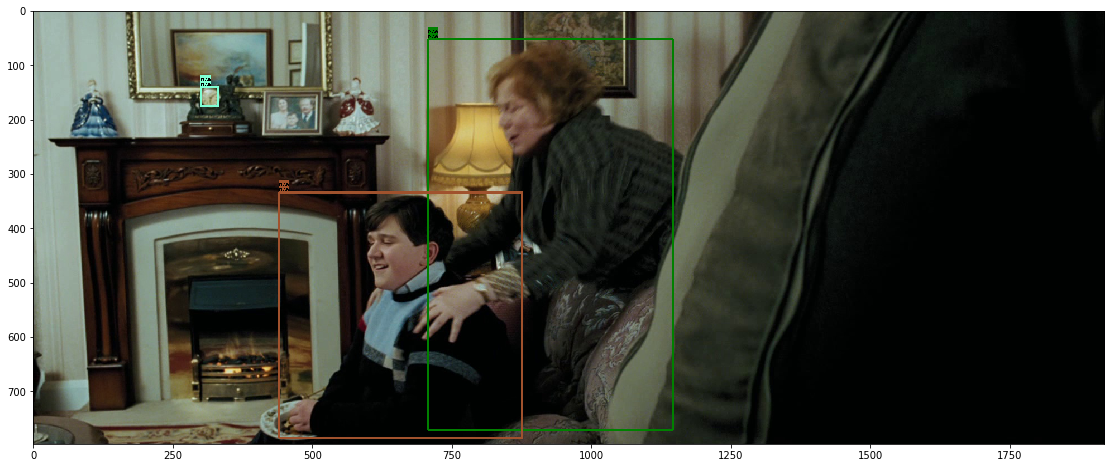

In [60]:
%matplotlib inline

import json 
import re 
from shutil import copy2
from PIL import Image, ImageDraw, ImageFont,ImageFont
import matplotlib.pyplot as plt
import glob
import os
import json
import dlib
from skimage import io
import numpy as np
import shutil
from collections import defaultdict
from object_detection.utils import visualization_utils as vis_util
import scipy.misc



# for i in image_idx:
for i in [2]:
    boxes_ = []
    classes_ = []
    scores_ = []
    cate = {}

    
#     fn = filenames[i].replace('json', 'jpg')
    fn = "/home/suji/spring20/vilbert_beta/data/VCR/vcr1images/lsmdc_1054_Harry_Potter_and_the_prisoner_of_azkaban/1054_Harry_Potter_and_the_prisoner_of_azkaban_00.02.19.266-00.02.23.584@1.jpg"
    print(fn)
    img = io.imread(fn)
    meta_fn = fn
    for obj_bb, sbj_bb, obj_score, sbj_score, rel_score, label_obj, label_sbj, label_rel in zip(boxes_obj[i], boxes_sbj[i],scores_obj[i][0], scores_sbj[i][0],scores_rel[i][0], labels_obj[i][0],  labels_sbj[i][0], labels_rel[i][0]):
        print(obj_bb, sbj_bb, obj_score, sbj_score, rel_score, _object_categories[label_sbj], _predicate_classes[label_rel], _object_categories[label_obj])
        x1, y1, x2, y2 = obj_bb #before scaling values
        pred_rel = _predicate_classes[label_rel]
        boxes_.append((int(y1), int(x1), int(y2), int(x2))) 
        cate[len(classes_)] = {'name': ""}
        classes_.append(label_obj)
        scores_.append(obj_score)
#         break
        
    boxes = np.array(boxes_)
    classes = np.array(classes_)
    scores = np.array(scores_)
    vis_util.visualize_boxes_and_labels_on_image_array(img, boxes, classes, scores, cate, min_score_thresh=0.0, skip_scores=1, track_ids = None)
    fig2 = plt.figure(figsize = (1.920*10,.797*10)) # create a 5 x 5 figure 
    ax3 = fig2.add_subplot(111)
    ax3.imshow(img,aspect='auto')
    plt.show()

In [ ]:
img.shape

In [75]:
!python -V

Python 3.6.9 :: Anaconda, Inc.


In [58]:
plt.close('all')

In [49]:
np.argmax(scores_obj[0][0])

0

In [41]:
len(labels_obj[3][0])

250

In [43]:
len((boxes_obj[3][0]))

4